In [1]:
# Initial imports
from alpaca_trade_api.rest import REST, TimeFrame
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from datetime import date
load_dotenv()
import requests
import pandas as pd
import numpy as np
import getpass
import os

In [2]:
from MACDBacktester import MACDBacktester as MACD

In [3]:
# API Info for fetching data, portfolio, etc. from Alpaca
BASE_URL = "https://paper-api.alpaca.markets"

if os.getenv("APCA_API_KEY_ID") is not None:
    ALPACA_API_KEY = os.getenv("APCA_API_KEY_ID")
else:

    ALPACA_API_KEY = getpass.getpass('Type your alpaca api key here, it is safe from viewing.')

if os.getenv("ALPACA_SECRET_KEY") is not None:
    ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
else:

    ALPACA_SECRET_KEY = getpass.getpass('Type your secret alpaca api key here, it is safe from viewing.')

# Instantiate REST API Connection - Account
api_account = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=True,base_url=BASE_URL, api_version='v2')

# Instantiate REST API Connection - Trade
api_trade = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=False, base_url=BASE_URL, api_version='v2')

In [4]:
# ticker symbol with which to work with
symbol = 'BTCUSD'

# time window in days for shorter EMA
ema_s = 12

# time window in days for longer EMA
ema_l = 26

# time window is days for MACD Signal 
signal_mw = 9

# Get the start date and end dates
start = "2009-01-03" # Bitcoin's genesis block date
end = "2022-03-16"

# proportional transaction costs per trade
tc = 0.0000        

In [5]:
tester = MACD(symbol, EMA_S = ema_s, EMA_L = ema_l, signal_mw = signal_mw,
              start = start, end = end, tc = tc,api=api_trade)

In [6]:
tester

MACDBacktester(symbol = BTCUSD, MACD(12, 26, 9), start = 2009-01-03, end = 2022-03-16, api = <alpaca_trade_api.rest.REST object at 0x0000025DB0259C08>)

In [7]:
tester.data

,close,returns,EMA_S,EMA_L,MACD,MACD_Signal
timestamp,,,,,,
2015-01-07 06:00:00+00:00,275.44,NaN,NaN,NaN,NaN,NaN
2015-01-08 06:00:00+00:00,288.99,0.048022,NaN,NaN,NaN,NaN
2015-01-12 06:00:00+00:00,260.00,-0.105710,NaN,NaN,NaN,NaN
2015-01-13 06:00:00+00:00,219.63,-0.168737,NaN,NaN,NaN,NaN
2015-01-14 06:00:00+00:00,120.00,-0.604453,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-03-12 06:00:00+00:00,39128.83,-0.001259,39575.410393,39921.494919,-346.084527,-267.324774
2022-03-13 06:00:00+00:00,38535.33,-0.015284,39415.398024,39818.816036,-403.418012,-294.543422
2022-03-14 05:00:00+00:00,38794.04,0.006691,39319.804482,39742.906700,-423.102218,-320.255181


In [8]:
tester.test_strategy()

(114.290963, -54.584475)

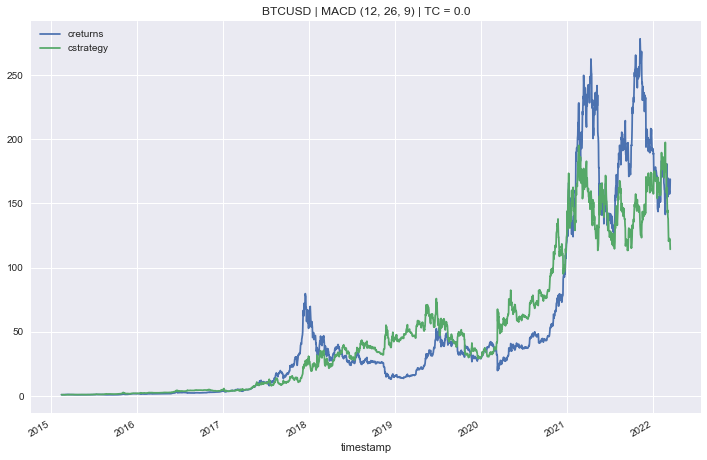

In [9]:
tester.plot_results()

In [10]:
tester.results

,close,returns,EMA_S,EMA_L,MACD,MACD_Signal,position,strategy,trades,creturns,cstrategy
timestamp,,,,,,,,,,,
2015-02-14 06:00:00+00:00,256.66,0.046739,232.764908,231.566350,1.198558,-1.356474,1,0.046739,0.0,1.047848,1.047848
2015-02-15 06:00:00+00:00,235.54,-0.085872,233.192892,231.880359,1.312532,-0.772511,1,-0.085872,0.0,0.961623,0.961623
2015-02-16 06:00:00+00:00,235.98,0.001866,233.622566,232.202729,1.419837,-0.301686,1,0.001866,0.0,0.963420,0.963420
2015-02-17 06:00:00+00:00,244.82,0.036776,235.348269,233.190369,2.157900,0.218848,1,0.036776,0.0,0.999510,0.999510
2015-02-18 06:00:00+00:00,237.49,-0.030398,235.678254,233.525521,2.152733,0.623418,1,-0.030398,0.0,0.969584,0.969584
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12 06:00:00+00:00,39128.83,-0.001259,39575.410393,39921.494919,-346.084527,-267.324774,-1,0.001259,0.0,159.748632,120.820669
2022-03-13 06:00:00+00:00,38535.33,-0.015284,39415.398024,39818.816036,-403.418012,-294.543422,-1,0.015284,0.0,157.325590,122.681483
2022-03-14 05:00:00+00:00,38794.04,0.006691,39319.804482,39742.906700,-423.102218,-320.255181,-1,-0.006691,0.0,158.381808,121.863343


In [11]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([12., 24., 19.]), 619.944581)

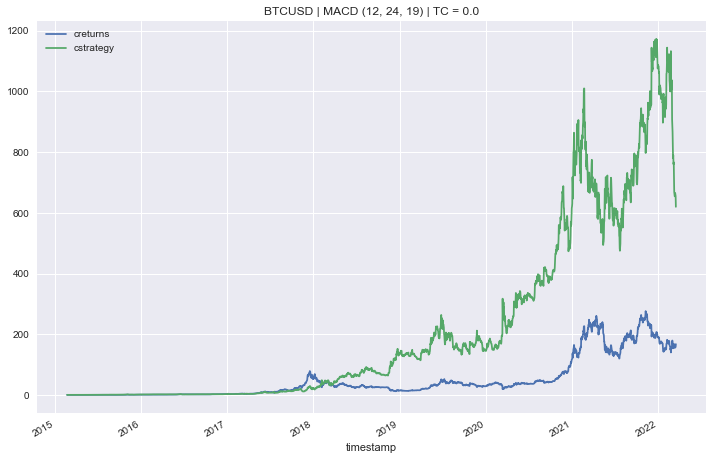

In [12]:
tester.plot_results()